In [2]:
import pandas as pd

df = pd.read_csv('flavors_of_cacao.csv')
  # Adjust path as needed
df.head()


,Company \r\n(Maker-if known),Specific Bean Origin\r\nor Bar Name,REF,Review\r\nDate,Cocoa\r\nPercent,Company\r\nLocation,Rating,Bean\r\nType,Broad Bean\r\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


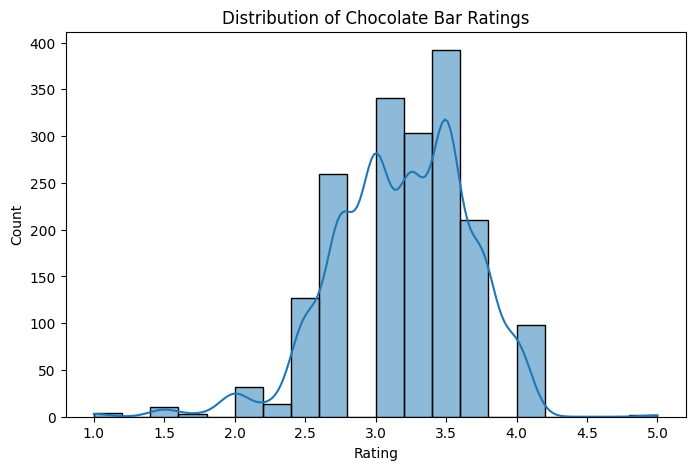

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Chocolate Bar Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

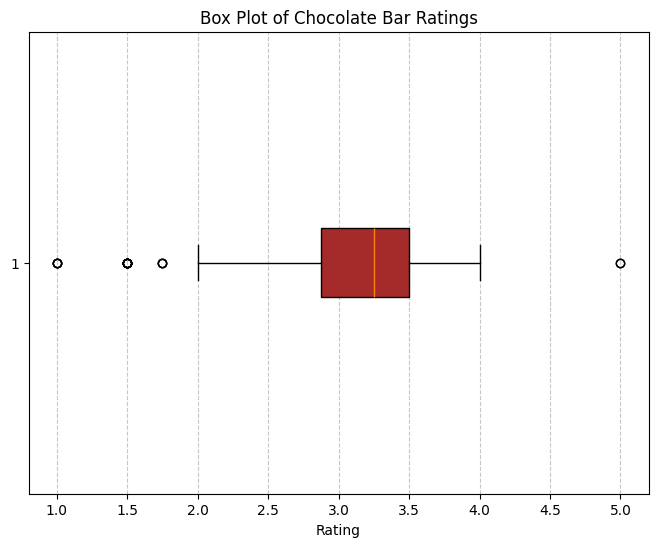

In [5]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
plt.title('Box Plot of Chocolate Bar Ratings')
plt.xlabel('Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [6]:
# First, clean the column name if needed
df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', '', regex=False).str.strip()

# Then rename for convenience (optional)
df.rename(columns={'Cocoa Percent': 'Cocoa_Percent'}, inplace=True)

# Now remove the "%" sign and convert to float
df['Cocoa_Percent'] = df['Cocoa_Percent'].str.replace('%', '').astype(float)

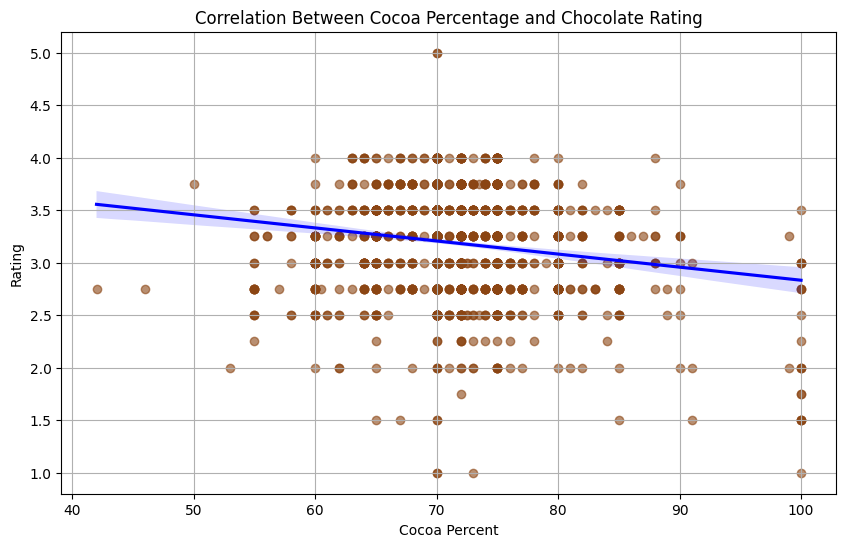

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean up the column names (you're doing this already)
df.columns = df.columns.str.replace('\n', ' ').str.strip()

# Some CSVs have weird carriage return characters like '\r'
df.columns = df.columns.str.replace('\r', '', regex=False)

# Optional: rename for convenience
df.rename(columns={"Cocoa Percent": "Cocoa_Percent"}, inplace=True)

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Cocoa_Percent',
    y='Rating',
    scatter_kws={'color': 'saddlebrown', 'alpha': 0.6},
    line_kws={'color': 'blue'},
)

plt.title('Correlation Between Cocoa Percentage and Chocolate Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [8]:
#COLUMN NAMES!!!!!!!!!!!!!!!!!
print(df.columns)

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa_Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')


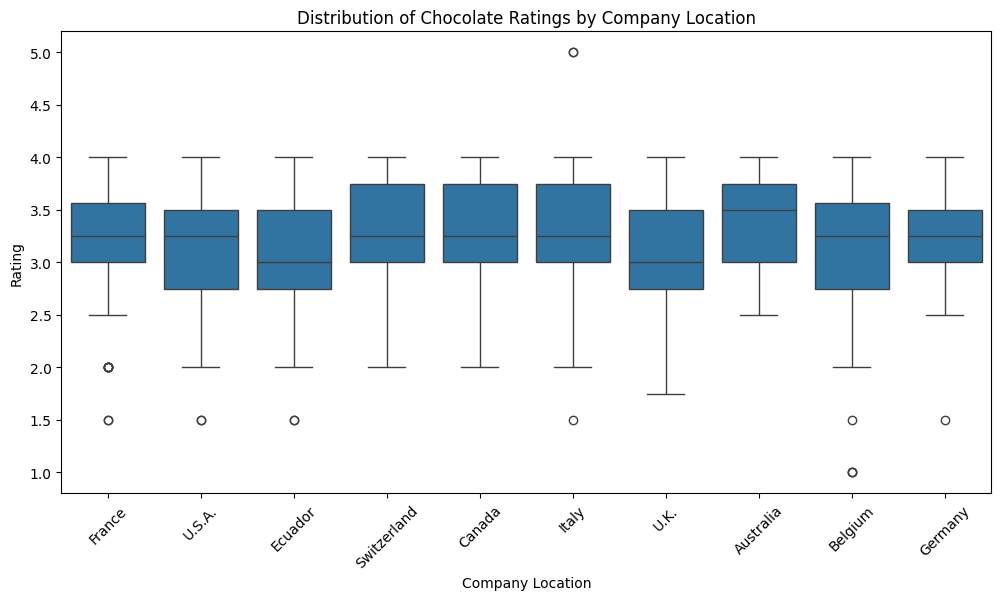

In [9]:
# You can limit to the top 10 most common company locations
top_locations = df['Company Location'].value_counts().head(10).index
subset = df[df['Company Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Location', y='Rating', data=subset)
plt.title("Distribution of Chocolate Ratings by Company Location")
plt.xlabel("Company Location")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

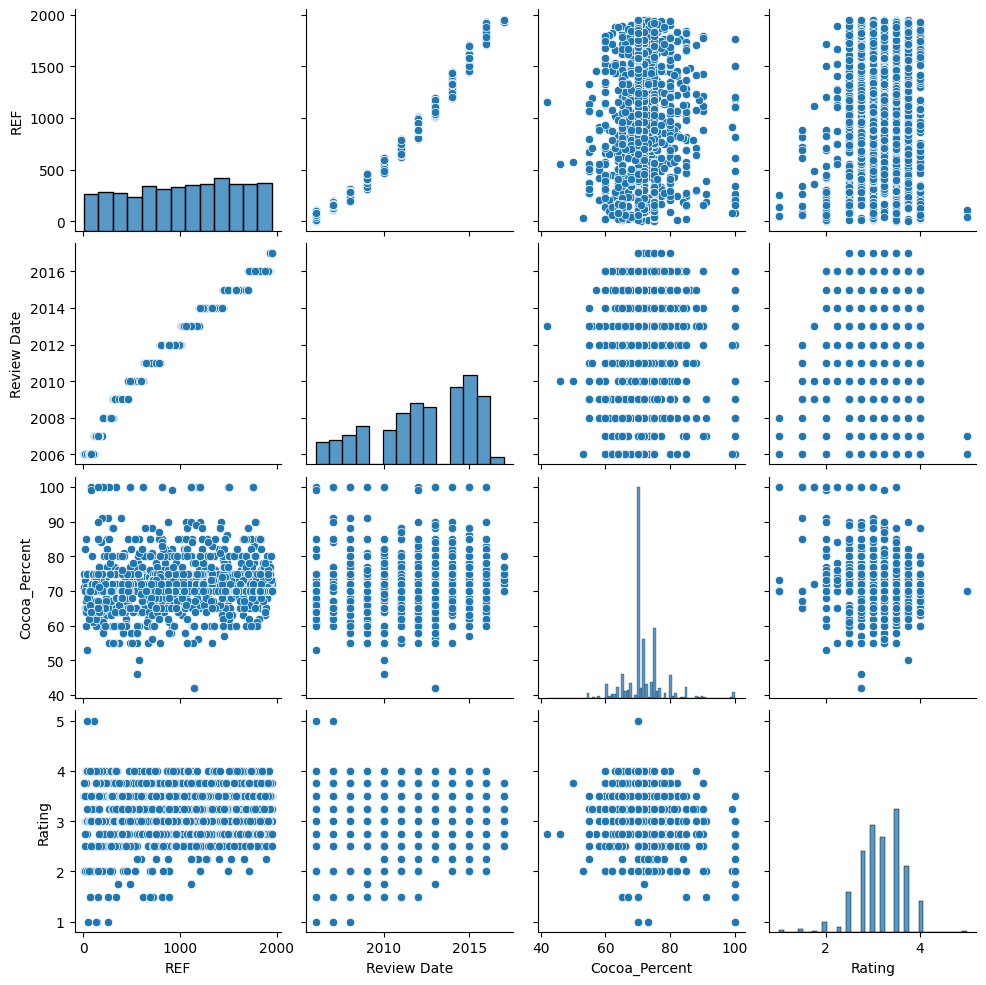

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# relationship between every variable of our matrix
# only works for numerical data
sns.pairplot(df)
plt.show()

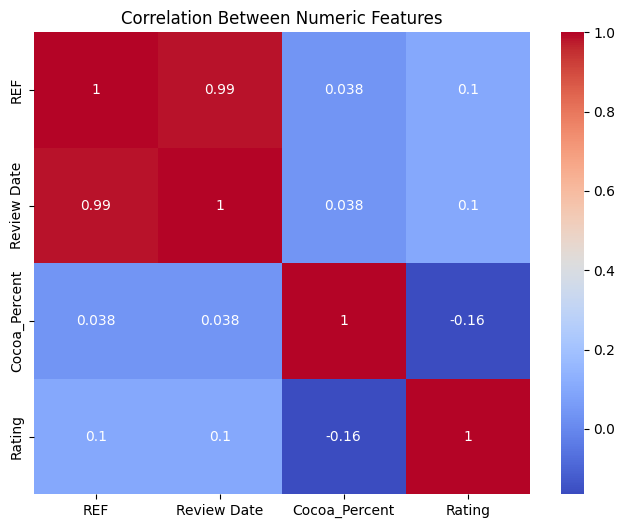

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only include numeric features
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

In [12]:
#Create rating class column
def classify_rating(rating):
    if rating <= 2.5:
        return 'Low'
    elif rating <= 3.5:
        return 'Medium'
    else:
        return 'High'

df['Rating_Class'] = df['Rating'].apply(classify_rating)
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa_Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating_Class
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,High
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,Medium
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,Medium
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,Medium
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,Medium


In [13]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa_Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

In [14]:
#Clean and rename columns

df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', '', regex=False).str.strip()
df.rename(columns={
    "Company  (Maker-if known)": "Company",
    "Specific Bean Origin or Bar Name": "BarName",
    "Cocoa Percent": "Cocoa_Percent",
    "Company Location": "Company_Location",
    "Bean Type": "Bean_Type",
    "Broad Bean Origin": "Broad_Bean_Origin",
    "Review Date": "Review_Date"
}, inplace=True)

# Convert Cocoa_Percent to float
df['Cocoa_Percent'] = df['Cocoa_Percent'].astype(str).str.rstrip('%').astype(float)

# Convert Review Date to datetime; might be useful for analysis
df['Review_Date'] = pd.to_datetime(df['Review_Date'].astype(str), format='%Y', errors='coerce')

# Define features and target
features = ['Cocoa_Percent', 'Company_Location', 'Broad_Bean_Origin']
target = 'Rating_Class'

X = df[features]
y = df[target]

print(X.head())
print(y.value_counts())




   Cocoa_Percent Company_Location Broad_Bean_Origin
0           63.0           France          Sao Tome
1           70.0           France              Togo
2           70.0           France              Togo
3           70.0           France              Togo
4           70.0           France              Peru
Rating_Class
Medium    1295
High       310
Low        190
Name: count, dtype: int64


In [15]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Encode categorical features and feature scaling

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



numeric_features = ['Cocoa_Percent']
categorical_features = ['Company_Location', 'Broad_Bean_Origin']


# Column transformer lets you apply different preprocessing to different columns
# We want to scale the numeric features and one-hot encode the categorical ones
# Standard scaler standardizes features by removing the mean and scaling to unit variance
# One-hot encoder converts categorical variable(s) into dummy/indicator variables
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Create the pipeline
# The pipeline will first apply the preprocessor to the features and then fit a logistic regression model
# Automatically chains multiple steps together (like cleaning, transforming, modeling) so you don’t have to do each one manually every time.
# Using logistic regression in the pipeline as a classifier
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Train the pipeline
clf_pipeline.fit(X_train, y_train)
print("Model training complete.")

# Make predictions
y_pred = clf_pipeline.predict(X_test)
print("Predictions made")

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model training complete.
Predictions made
Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        62
         Low       1.00      0.03      0.05        38
      Medium       0.72      1.00      0.84       259

    accuracy                           0.72       359
   macro avg       0.57      0.34      0.30       359
weighted avg       0.63      0.72      0.61       359

Confusion Matrix:
[[  0   0  62]
 [  0   1  37]
 [  1   0 258]]
